# ML Application Example
## Regression

The task of this example is to implement a complete Data Driven pipeline (load, data-analysis, visualisation, model selection and optimization, prediction) on a specific Dataset. In this example the challenge is to perform a regression with different models to find the most accurate prediction.  


## Dataset 
The notebook will upload a public available dataset: https://archive.ics.uci.edu/ml/datasets/energy+efficiency
<blockquote>
  <b>Source:</b>
    The dataset was created by Angeliki Xifara (angxifara@gmail.com, Civil/Structural Engineer) and was processed by Athanasios    
    Tsanas (tsanasthanasis@gmail.com, Oxford Centre for Industrial and Applied Mathematics, University of Oxford, UK).
    <br/>
    <b>Data Set Information:</b>
    The author of the dataset perform energy analysis using 12 different building shapes simulated in Ecotect. The buildings differ with 
    respect to the glazing area, the glazing area distribution, and the orientation, amongst other parameters. They simulate various 
    settings as functions of the afore-mentioned characteristics to obtain 768 building shapes. The dataset comprises 768 samples and 8 
    features, aiming to predict two real valued responses. It can also be used as a multi-class classification problem if the response 
    is rounded to the nearest integer.
    <br/>
    <b>Attribute Information:</b>
    The dataset contains eight attributes (or features, denoted by X1...X8) and two responses (or outcomes, denoted by y1 and y2). The 
    aim is to use the eight features to predict each of the two responses.
    <br/>
    <b>Specifically:</b>
    <br/>
    <code><br/> X1 :: Relative Compactness <br/> X2 :: Surface Area <br/> X3 :: Wall Area <br/> X4 :: Roof Area </code>
    <code><br/> X5 :: Overall Height <br/> X6 :: Orientation <br/> X7 :: Glazing Area <br/> X8 :: Glazing Area Distribution </code>
    <code><br/> y1 :: Heating Load <br/> y2 :: Cooling Load </code>
    <br/>
</blockquote>

In [1]:
# algebra
import numpy as np
# data structure
import pandas as pd
# data visualization
import matplotlib.pylab as plt
import seaborn as sns
#file handling
from pathlib import Path
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix


# Data load
The process consist in downloading the data if needed, loading the data as a Pandas dataframe

In [2]:
    
filename  = "Faults.NNA"
separator = '\t'
columns   = ['X_Minimum',
            'X_Maximum',
            'Y_Minimum',
            'Y_Maximum',
            'Pixels_Areas',
            'X_Perimeter',
            'Y_Perimeter',
            'Sum_of_Luminosity',
            'Minimum_of_Luminosity',
            'Maximum_of_Luminosity',
            'Length_of_Conveyer',
            'TypeOfSteel_A300',
            'TypeOfSteel_A400',
            'Steel_Plate_Thickness',
            'Edges_Index',
            'Empty_Index',
            'Square_Index',
            'Outside_X_Index',
            'Edges_X_Index',
            'Edges_Y_Index',
            'Outside_Global_Index',
            'LogOfAreas',
            'Log_X_Index',
            'Log_Y_Index',
            'Orientation_Index',
            'Luminosity_Index',
            'SigmoidOfAreas',
            'Pastry',
            'Z_Scratch',
            'K_Scatch',
            'Stains',
            'Dirtiness',
            'Bumps',
            'Other_Faults']


In [3]:
#if the dataset is not already in the working dir, it will download
my_file = Path(filename)
if not my_file.is_file():
  print("Downloading dataset")
  !wget https://archive.ics.uci.edu/ml/machine-learning-databases/00198/Faults.NNA


In [4]:
#function to semplificate the load of dataset, in case it is a csv, tsv or excel file
#output is a pandas dataframe 
def load_csv(filename,separator,columns):
    
    try:
    
        csv_table = pd.read_csv(filename,sep=separator,names=columns,dtype='float64')
    
    except:
        
        csv_table = pd.read_excel(filename,names=columns)
    print("n. samples: {}".format(csv_table.shape[0]))
    print("n. columns: {}".format(csv_table.shape[1]))

    return csv_table #.dropna()

data = load_csv(filename,separator,columns)

n. samples: 1941
n. columns: 34


# Data Analysis and Visualization
In this section confidence with the data is gained, data are plotted and cleaned

In [5]:
#How does the dataset look like? 
data.head()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,42.0,50.0,270900.0,270944.0,267.0,17.0,44.0,24220.0,76.0,108.0,...,0.8182,-0.2913,0.5822,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,645.0,651.0,2538079.0,2538108.0,108.0,10.0,30.0,11397.0,84.0,123.0,...,0.7931,-0.1756,0.2984,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,829.0,835.0,1553913.0,1553931.0,71.0,8.0,19.0,7972.0,99.0,125.0,...,0.6667,-0.1228,0.2150,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,853.0,860.0,369370.0,369415.0,176.0,13.0,45.0,18996.0,99.0,126.0,...,0.8444,-0.1568,0.5212,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1289.0,1306.0,498078.0,498335.0,2409.0,60.0,260.0,246930.0,37.0,126.0,...,0.9338,-0.1992,1.0000,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
Faults = ['Pastry',
'Z_Scratch',
'K_Scatch',
'Stains',
'Dirtiness',
'Bumps',
'Other_Faults']

data['class'] = (data[Faults]*np.arange(len(Faults))).sum(axis=1)

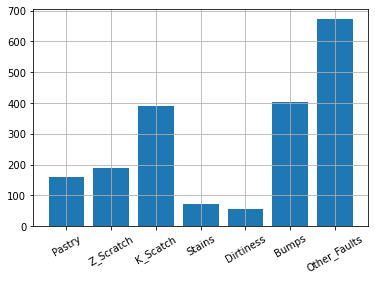

In [7]:
plt.bar(Faults,data[Faults].sum())
plt.xticks(rotation=30)
plt.grid()

In [8]:
#Name of all columns
print(data.columns.values)

['X_Minimum' 'X_Maximum' 'Y_Minimum' 'Y_Maximum' 'Pixels_Areas'
 'X_Perimeter' 'Y_Perimeter' 'Sum_of_Luminosity' 'Minimum_of_Luminosity'
 'Maximum_of_Luminosity' 'Length_of_Conveyer' 'TypeOfSteel_A300'
 'TypeOfSteel_A400' 'Steel_Plate_Thickness' 'Edges_Index' 'Empty_Index'
 'Square_Index' 'Outside_X_Index' 'Edges_X_Index' 'Edges_Y_Index'
 'Outside_Global_Index' 'LogOfAreas' 'Log_X_Index' 'Log_Y_Index'
 'Orientation_Index' 'Luminosity_Index' 'SigmoidOfAreas' 'Pastry'
 'Z_Scratch' 'K_Scatch' 'Stains' 'Dirtiness' 'Bumps' 'Other_Faults'
 'class']


In [9]:
#let's have a look at the data and their correlations, if any
measurements = ['X_Minimum',
            'X_Maximum',
            'Y_Minimum',
            'Y_Maximum',
            'Pixels_Areas',
            'X_Perimeter',
            'Y_Perimeter',
            'Sum_of_Luminosity',
            'Minimum_of_Luminosity',
            'Maximum_of_Luminosity',
            'Length_of_Conveyer',
            'TypeOfSteel_A300',
            'TypeOfSteel_A400',
            'Steel_Plate_Thickness',
            'Edges_Index',
            'Empty_Index',
            'Square_Index',
            'Outside_X_Index',
            'Edges_X_Index',
            'Edges_Y_Index',
            'Outside_Global_Index',
            'LogOfAreas',
            'Log_X_Index',
            'Log_Y_Index',
            'Orientation_Index',
            'Luminosity_Index',
            'SigmoidOfAreas']
target       = ['class']
#sns.pairplot(data[measurements+target],hue='class')

(-6.0, 4.0)

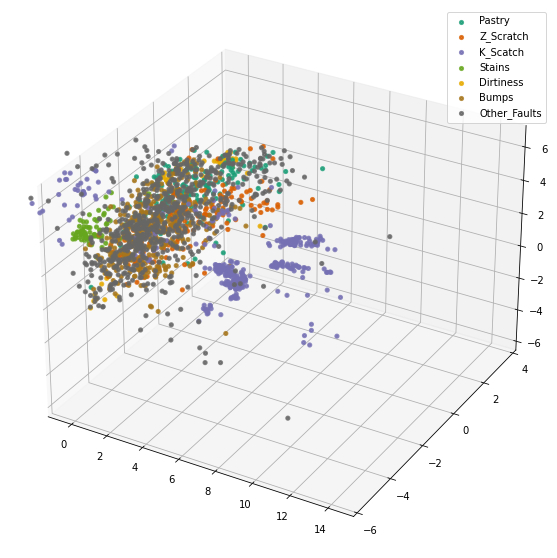

In [10]:
from sklearn.decomposition import PCA

aux = data[measurements]
aux = (aux-aux.mean())/aux.std()

pca = PCA(n_components=3)
X_r = pca.fit(aux).transform(aux)
y_r   = data[target].values.flatten()


colors = plt.cm.get_cmap('Dark2')(np.linspace(0,1,len(Faults)))
lw = 2

fig = plt.figure(figsize=[10,10])
ax = fig.add_subplot(111, projection='3d')
for color, i, target_name in zip(colors, range(len(Faults)), Faults):
    ax.scatter(X_r[y_r == i, 0], X_r[y_r == i, 1], X_r[y_r == i, 2], color=color, alpha=.8, lw=lw,
                label=target_name,s=10)    
plt.legend()
plt.xlim([-1,15])
plt.ylim([-6,4])

C:\Users\efeltres\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning:

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.



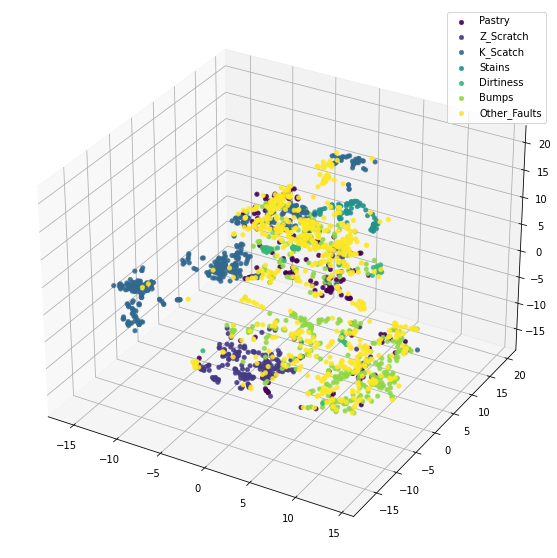

In [13]:
import plotly.express as px

    
px.scatter_3d(X_r[:,0], X_r[:,1], X_r[:, 2], color=data['class'].values)

for color, i, target_name in zip(colors, range(len(Faults)), Faults):
    px.scatter(X_r[y_r == i, 0], X_r[y_r == i, 1], X_r[y_r == i, 2], color=color, alpha=.8, lw=lw,
                label=target_name,s=10)    
plt.legend()

fig.show()

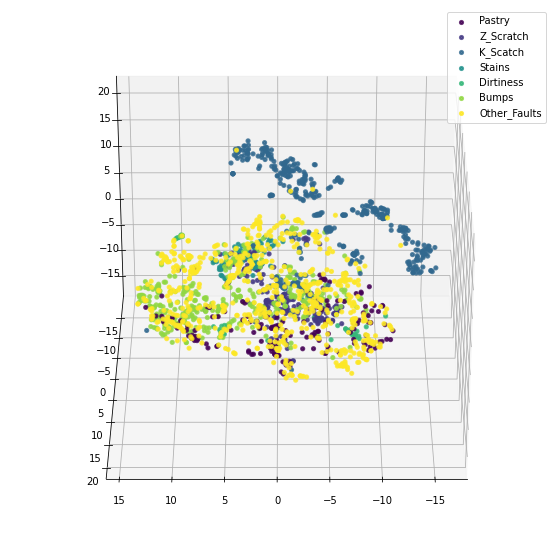

In [12]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=3)
X_r = tsne.fit_transform(aux)
y_r  = data[target].values.flatten()


colors = plt.cm.get_cmap('viridis')(np.linspace(0,1,len(Faults)))
lw = 2

fig = plt.figure(figsize=[10,10])
ax = fig.add_subplot(111, projection='3d')
for color, i, target_name in zip(colors, range(len(Faults)), Faults):
    ax.scatter(X_r[y_r == i, 0], X_r[y_r == i, 1], X_r[y_r == i, 2], color=color, alpha=.8, lw=lw,
                label=target_name,s=10)   
ax.view_init(30, 90)
    
plt.legend()
#plt.xlim([-1,15])
#plt.ylim([-6,4])

In [13]:
#Select only the interesting variable for the model, and remove any anomalous value (e.g. "nan")
data = data.dropna()

# Machine Learning
Here the interesting input features and output to predict for the task are selected, the data are opportunelly preprocessed (i.e. normalized), the dataset is splitted in two separate train and test subsets, each model is trained on the training data and evaluated against a test set. <br/>
The evaluation metrics list can be found <a href='https://scikit-learn.org/stable/modules/model_evaluation.html'>here</a>

In [14]:
#the module needed for the modeling and data mining are imported
#Cross-Validation 
from sklearn.model_selection import train_test_split
#Data normalization
from sklearn.preprocessing   import StandardScaler
#metrics to evaluate the model
from sklearn.metrics import mean_squared_error

In [15]:
#Selection of feature and output variable, definition of the size (fraction of the total) of the random selected test set
input_features = measurements
output         = target
test_size      = 0.33
random_state   = 0

In [16]:
#not preprocessed data
unnormalized_X,y = data[input_features],data[output]

In [17]:
# normalisation
#Having features on a similar scale can help the model converge more quickly towards the minimum
scaler_X = StandardScaler().fit(unnormalized_X)
X = scaler_X.transform(unnormalized_X)

In [18]:
#check if nan are present on the data after normalization to avoid trouble later
sum(np.isnan(X))

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0])

In [19]:
# basic train-test dataset random split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=test_size,
                                                    random_state=random_state)

In [20]:
#dictionary to help the display of the results
Score_Dict = {}

#function introduced to simplifies the following comparison and test of the various
#return the trained model and the score of the selected metrics
def fit_predict_plot(model,X_train,y_train,X_test,y_test,class_names):
    model.fit(X_train,y_train)

    pred_y_test = model.predict(X_test)

    score = confusion_matrix(y_test,pred_y_test)

    model_name = type(model).__name__
    if(model_name=='GridSearchCV'):
        model_name ='CV_'+type(model.estimator).__name__

    #Alternative metrics are listed here:https://scikit-learn.org/stable/modules/model_evaluation.html
    Score_Dict[model_name]=score

    fig,ax = plt.subplots(1,1,figsize=[10,10])
    
    np.set_printoptions(precision=2)

    plot_confusion_matrix(model,X_test,y_test,display_labels=class_names,
                                 cmap     =plt.cm.Blues,
                                 normalize='true',
                                 xticks_rotation=45,ax=ax)
    plt.axis('tight')
    
    correctly_classified = np.sum(np.diag(score))/np.sum(score)
    print("correctly classified {:.2f}".format(correctly_classified))
    
    return model,correctly_classified



## Models
Used linear models in this example are:
<ul>
 <li><a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression">Logistic Regression</a></li>
    <li><a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeClassifier.html#sklearn.linear_model.RidgeClassifier">Ridge</a></li>
    <li><a href="https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier">kNN</a></li>
     <li><a href="https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html">Support Vector Classification</a></li>
     <li><a href="https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html?highlight=random%20forest%20classifier#sklearn.ensemble.RandomForestClassifier">Random Forest</a></li>
</ul>

# Ridge Classifier

0.68
{'alpha': 1.0}


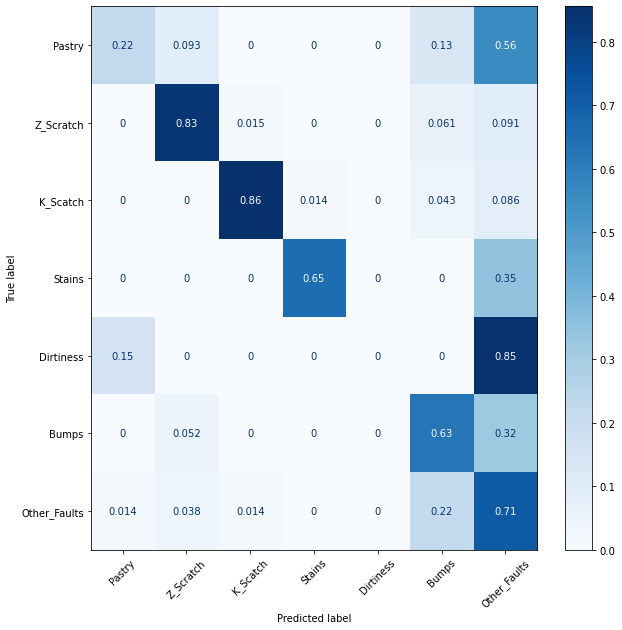

In [43]:
#initialization, fit and evaluation of the model
from sklearn.linear_model import RidgeClassifier
from sklearn.model_selection import GridSearchCV
estimator = RidgeClassifier()

parameters = { 'alpha':np.logspace(-2,2,5)}
model = GridSearchCV(estimator, parameters,cv=5)

model, ridge_score = fit_predict_plot(model,X_train,y_train.values.flatten(),X_test,y_test.values.flatten(),Faults)
print(model.best_params_)

# Logistic Regression

/Users/Tommaso/opt/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/Tommaso/opt/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

0.74
{'C': 56.23413251903491}


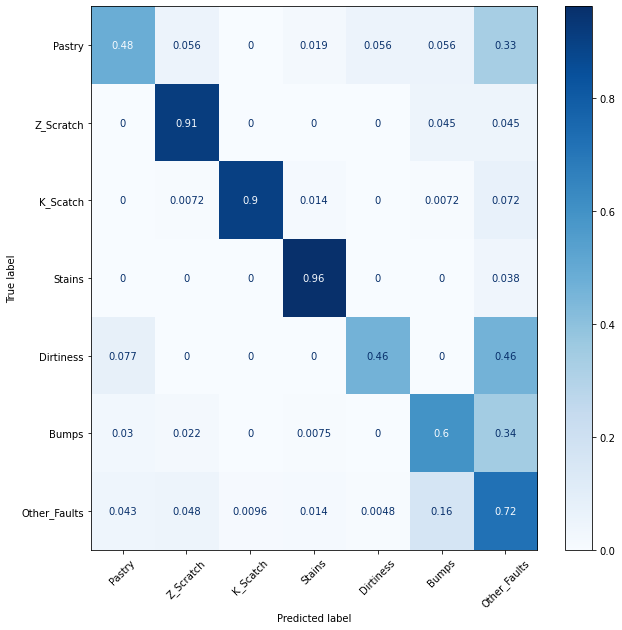

In [44]:
#initialization, fit and evaluation of the model
from sklearn import linear_model
estimator = linear_model.LogisticRegression(max_iter=1000)

parameters = { 'C':np.logspace(-2,3,5)}
model = GridSearchCV(estimator, parameters,cv=5)

model, logistic_score = fit_predict_plot(model,X_train,y_train.values.flatten(),X_test,y_test.values.flatten(),Faults)
print(model.best_params_)

# kNN

0.73
{'n_neighbors': 5}


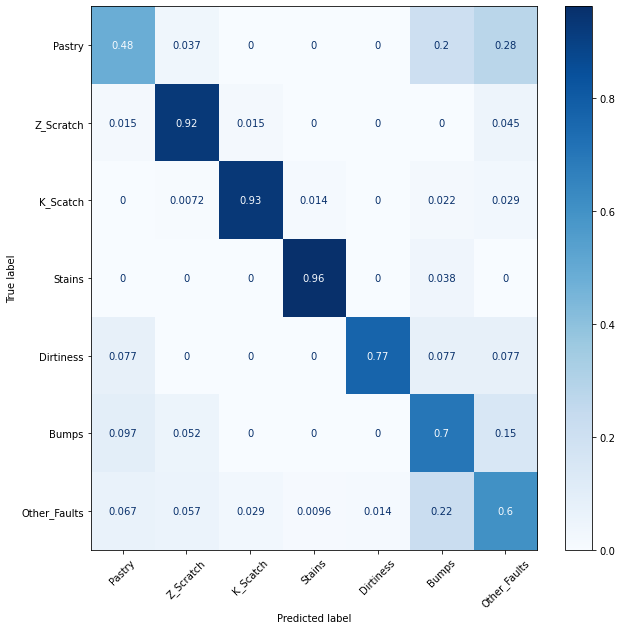

In [45]:
#initialization, fit and evaluation of the model
from sklearn.neighbors import KNeighborsClassifier
estimator = KNeighborsClassifier()

parameters = { 'n_neighbors':[3,5,7]}
model = GridSearchCV(estimator, parameters,cv=5)

model, knn_score = fit_predict_plot(model,X_train,y_train.values.flatten(),X_test,y_test.values.flatten(),Faults)
print(model.best_params_)

# SVC

0.77
{'C': 10}


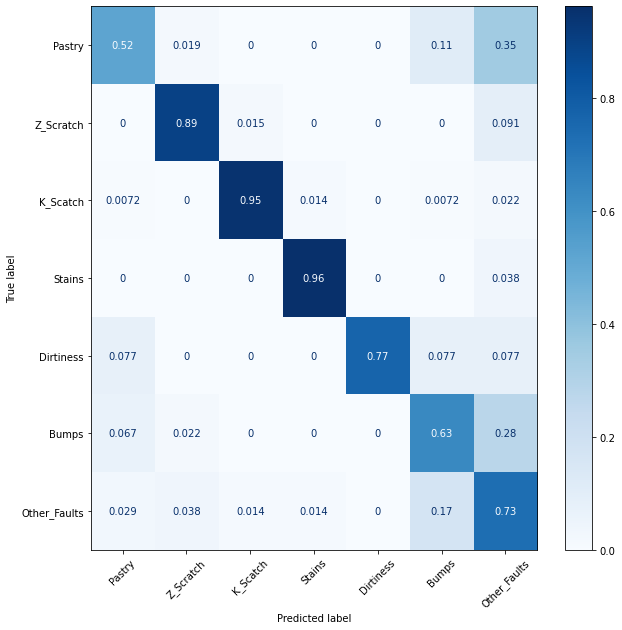

In [46]:
from sklearn.svm import SVC
estimator = SVC(gamma='auto')

parameters = { 'C':[0.1,1,10,100]}
model = GridSearchCV(estimator, parameters,cv=5)

model, svc_score = fit_predict_plot(model,X_train,y_train.values.flatten(),X_test,y_test.values.flatten(),Faults)
print(model.best_params_)

# Random Forest

0.75
{'class_weight': 'balanced_subsample', 'min_samples_leaf': 3, 'n_estimators': 100}


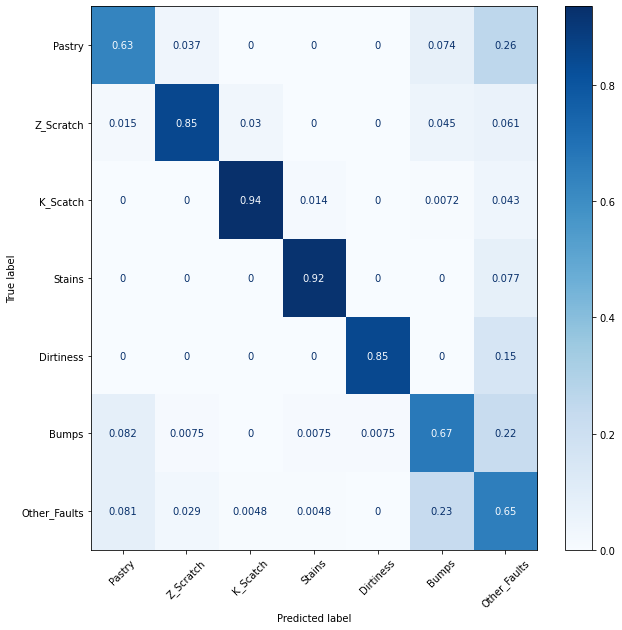

In [47]:
#initialization, fit and evaluation of the model
from sklearn.ensemble import RandomForestClassifier
estimator = RandomForestClassifier()

parameters = { 'min_samples_leaf':[1,3,5],
              'class_weight':['balanced_subsample'],
              'n_estimators':[10,100,200]}
model = GridSearchCV(estimator, parameters,cv=5)

model, rf_score = fit_predict_plot(model,X_train,y_train.values.flatten(),X_test,y_test.values.flatten(),Faults)
print(model.best_params_)

In [49]:
Score_Dict = {'Ridge':ridge_score,
             'Logistic':logistic_score,
             'kNN':knn_score,
              'SVC':svc_score,
             'RF':rf_score}

<table><tr><th> Model</th><th> Accuracy Metric </th></tr><tr> <td>Ridge</td><td>0.68</td></tr><tr> <td>Logistic</td><td>0.74</td></tr><tr> <td>kNN</td><td>0.73</td></tr><tr> <td>SVC</td><td>0.77</td></tr><tr> <td>RF</td><td>0.75</td></tr></table>

(0.5, 0.8)

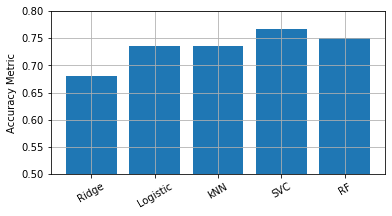

In [53]:
#print out the results in a table
from IPython.display import Markdown as md
from IPython.display import display


table = '<table><tr><th> Model</th><th> Accuracy Metric </th></tr>'

for key, value in Score_Dict.items():
    table +='<tr> <td>'+key+'</td><td>' +'%.2f'%(value)+'</td></tr>'
table+='</table>'
display(md(table))


names = list(Score_Dict.keys())
values = list(Score_Dict.values())

plt.figure(figsize=(6, 3))
plt.bar(names, values)
plt.ylabel('Accuracy Metric')
plt.xticks(rotation=30)
plt.grid()
plt.ylim([0.5,0.8])
